In [82]:
import numpy as np
import sympy as sp

from matplotlib import pyplot as plt
from sympy import init_printing

init_printing()

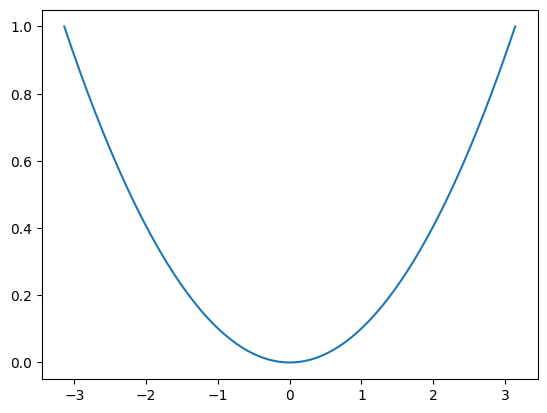

In [83]:
h, k, a, b = sp.symbols('h k a b')
f1_h = sp.Pow(h, 2)/sp.Pow(sp.pi,2)
cos_hk = sp.cos(h * k)
sin_hk = sp.sin(h * k)

theta = np.linspace(-np.pi,np.pi,300)
fh = np.array([f1_h.evalf(subs={'h':t}) for t in theta])
plt.plot(theta,fh)

In [84]:
a_s = [(1/(sp.pi)) * sp.integrate(f1_h * cos_hk.replace(k, v), (h, -sp.pi, sp.pi)) for v in range(16)]
b_s = [(1/(sp.pi)) * sp.integrate(f1_h * sin_hk.replace(k, 1), (h, -sp.pi, sp.pi)) for v in range(16)]
print(a_s)
print(b_s)

[2/3, -4/pi**2, pi**(-2), -4/(9*pi**2), 1/(4*pi**2), -4/(25*pi**2), 1/(9*pi**2), -4/(49*pi**2), 1/(16*pi**2), -4/(81*pi**2), 1/(25*pi**2), -4/(121*pi**2), 1/(36*pi**2), -4/(169*pi**2), 1/(49*pi**2), -4/(225*pi**2)]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [85]:
X = sp.Matrix([[0, 1], [1, 0]])
Z = sp.Matrix([[1, 0], [0, -1]])
P0 = sp.Matrix([[1, 0], [0, 0]])
Zero = sp.Matrix([[1], [0]])

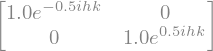

In [110]:
z_evol = sp.exp(-1j * h * k / 2 * Z)
z_evol

Matrix([[0, 1.0*exp(-0.5*I*(h*k + conjugate(h)*conjugate(k)))], [1.0*exp(0.5*I*(h*k + conjugate(h)*conjugate(k))), 0]])


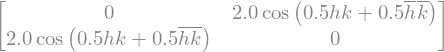

In [111]:
exp_evol = z_evol * X * z_evol.conjugate()
print(sp.simplify(exp_evol))
res = sp.simplify(exp_evol + exp_evol.conjugate())
res = sp.refine(res,sp.Q.real(h*k))
res

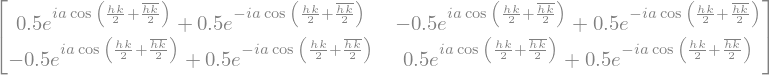

In [119]:

w_kha = sp.exp(-1j * a /2 * res)
w_kha

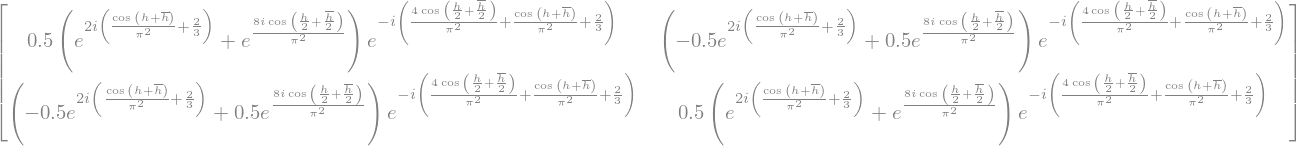

In [137]:
uf1_ax = sp.exp(-1j * a * X) * w_kha.evalf(subs={k: 1, a: a_s[1]}) * w_kha.evalf(subs={k: 2, a: a_s[2]})
uf1_x = sp.simplify(uf1_ax.replace(a, a_s[0]))
uf1_x


In [138]:
results = []
interval = np.linspace(-np.pi, np.pi, 200)
for i in interval:
    results.append(np.array(uf1_x.evalf(subs={h: i}) * Zero, dtype=np.complex128))

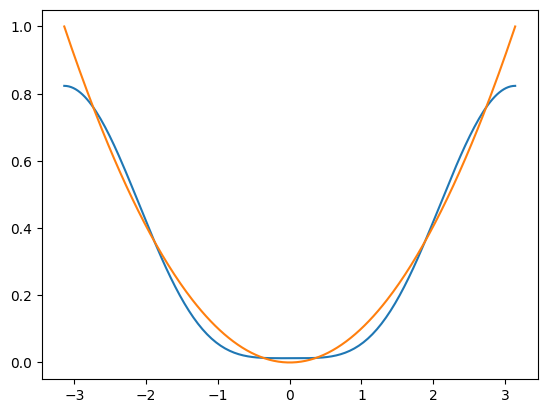

In [142]:
p0_expval = np.array([s[0][0] for s in results])
plt.plot(interval, np.arccos(np.real(p0_expval))-0.35)
plt.plot(theta,fh)